# Run this notebook to reproduce our experiments

### Sensitivity to Hyperparameters

In [ ]:
from sensitivity import test_sensitivity

In [ ]:
test_sensitivity()

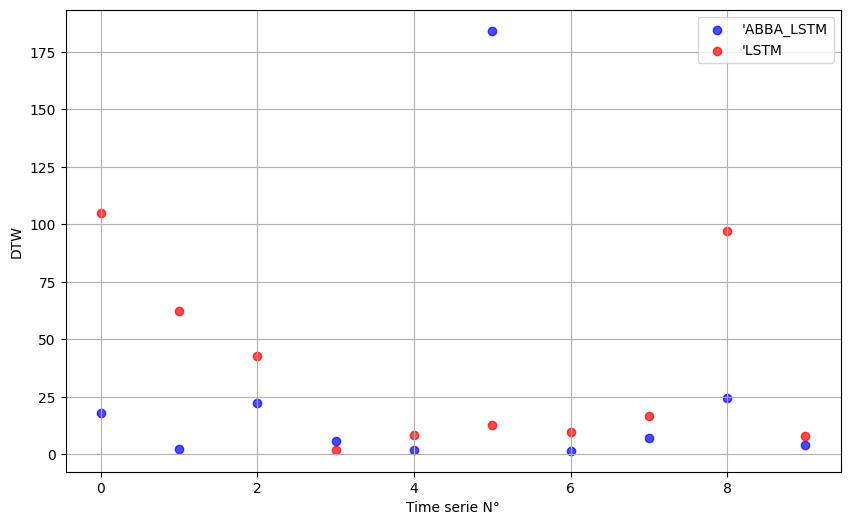

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_process_csv(file_path):

    with open(file_path, 'r') as f:
        raw_data = f.read()
    
    # Split the raw data into lines and extract header and rows
    lines = raw_data.split('\n')
    header = lines[0].split()  # Extract column names from the first line
    data = [list(map(float, line.split())) for line in lines[1:] if line.strip()]
    
    # Create and return DataFrame
    return pd.DataFrame(data, columns=header)

def plot_comparison(df, y_metric, label, color):
    plt.scatter(range(len(df[y_metric])), df[y_metric], label=label, color=color, alpha=0.7)

# File paths for datasets
file_paths = [
    ("./sensitivity/ABBA_LSTM_results_Lightning7.csv", "'ABBA_LSTM", 'blue'),
    ("./sensitivity/LSTM_results_Lightning7.csv", "'LSTM", 'red')
]

x_metric = 'Time serie N°'
y_metric = 'DTW'

plt.figure(figsize=(10, 6))

# Process each file and plot
for file_path, label, color in file_paths:
    df = load_and_process_csv(file_path)
    plot_comparison(df, y_metric, label, color)

# Finalize the plot
plt.xlabel(x_metric)
plt.ylabel(y_metric)
plt.legend()
plt.grid()
plt.show()


### Correlation between ABBA’s performance and forecasting performance

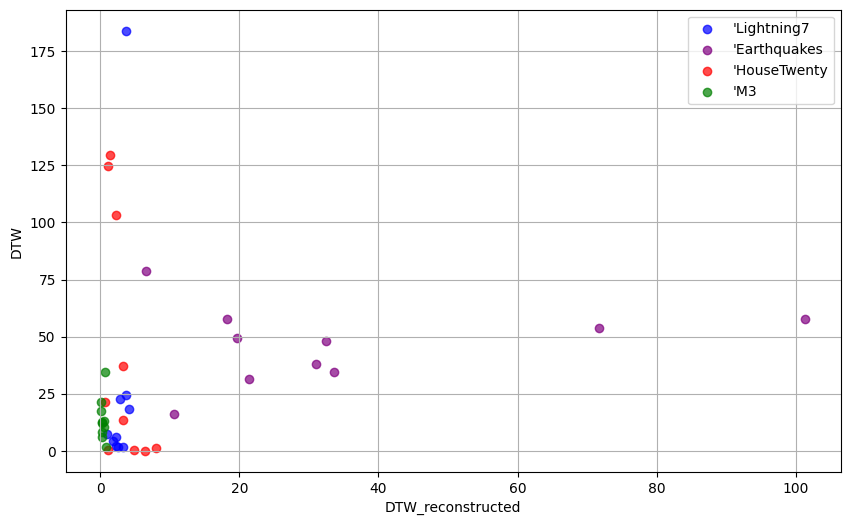

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_process_csv(file_path):

    with open(file_path, 'r') as f:
        raw_data = f.read()
    
    # Split the raw data into lines and extract header and rows
    lines = raw_data.split('\n')
    header = lines[0].split()  # Extract column names from the first line

    data = [list(map(float, line.split())) for line in lines[1:] if line.strip()]  # Process rows into numeric values
    
    # Create and return DataFrame
    return pd.DataFrame(data, columns=header)

def plot_comparison(df, x_metric, y_metric, label, color):
    plt.scatter(df[x_metric], df[y_metric], label=label, color=color, alpha=0.7)

# File paths for datasets
file_paths = [
    ("./sensitivity/ABBA_LSTM_results_Lightning7.csv", "'Lightning7", 'blue'),
    ("./sensitivity/LSTM_results_Earthquakes.csv", "'Earthquakes", 'purple'),
    ("./sensitivity/LSTM_results_HouseTwenty.csv", "'HouseTwenty", 'red'),
    ("./sensitivity/LSTM_results_M3.csv", "'M3", 'green'),
]

x_metric = 'DTW_reconstructed'
y_metric = 'DTW'

plt.figure(figsize=(10, 6))

# Process each file and plot
for file_path, label, color in file_paths:
    df = load_and_process_csv(file_path)
    plot_comparison(df, x_metric, y_metric, label, color)

# Finalize the plot
plt.xlabel(x_metric)
plt.ylabel(y_metric)
plt.legend()
plt.grid()
plt.show()


In [19]:
import pandas as pd
import numpy as np

def load_and_normalize_signals(file_path, has_labels=True):

    data = pd.read_csv(file_path, sep='\t', header=None)
    
    # Extract signal data (exclude first column if it contains labels)
    signals = data.iloc[:, 1:].values if has_labels else data.values
    signals = signals.astype(np.float64)
    
    # Normalize the signals
    signals -= np.mean(signals)
    signals /= np.std(signals)
    
    energies = np.sum(signals**2, axis=1)

    return signals, energies

def compute_normalized_ratios(reconstruction, energies, num_samples=10):
    """
    Compute normalized ratios of reconstruction values to signal energies.
    """
    energies_subset = energies[:num_samples]
    dtw_subset = reconstruction[:num_samples]
    
    normalized_ratios = dtw_subset / energies_subset
    return np.mean(normalized_ratios)

def load_and_process_csv(file_path):
    """
    Load and process a CSV file with space-separated values.
    """
    with open(file_path, 'r') as f:
        raw_data = f.read()
    

    lines = raw_data.split('\n')
    header = lines[0].split()  

    data = [list(map(float, line.split())) for line in lines[1:] if line.strip()] 
    
    return pd.DataFrame(data, columns=header)

# File paths
file_paths = [
    '../../../UCRArchive_2018/Earthquakes/Earthquakes_TEST.tsv',
    '../../../UCRArchive_2018/HouseTwenty/HouseTwenty_TEST.tsv',
    '../../../UCRArchive_2018/Lightning7/Lightning7_TEST.tsv'
]

files_paths_reconstructed = [
    './sensitivity/ABBA_LSTM_results_Earthquakes.csv',
    './sensitivity/ABBA_LSTM_results_HouseTwenty.csv',
    './sensitivity/ABBA_LSTM_results_Lightning7.csv'
]

for i in range(3):
    file_path = file_paths[i]
    file_path_reconstructed = files_paths_reconstructed[i]

    signals, energies = load_and_normalize_signals(file_path, has_labels=True)

    # Load DTW error values using `load_and_process_csv`
    reconstructed_data = load_and_process_csv(file_path_reconstructed)
    dtw_error = reconstructed_data['DTW_reconstructed'].values 

    mean_normalized_ratio = compute_normalized_ratios(dtw_error, energies)
    print(f"Mean normalized dtw-to-energy ratio for dataset {i + 1}: {mean_normalized_ratio}")


Mean normalized dtw-to-energy ratio for dataset 1: 0.06360045348058863
Mean normalized dtw-to-energy ratio for dataset 2: 0.0015266917791477786
Mean normalized dtw-to-energy ratio for dataset 3: 0.008612409813450291


/var/folders/21/y9qxt5655msd8zr23lpd27_00000gn/T/ipykernel_93063/186197597.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dtw_errors, labels=["M3.csv", "Earthquakes", "'HouseTwenty'", "'Lightning7'"])


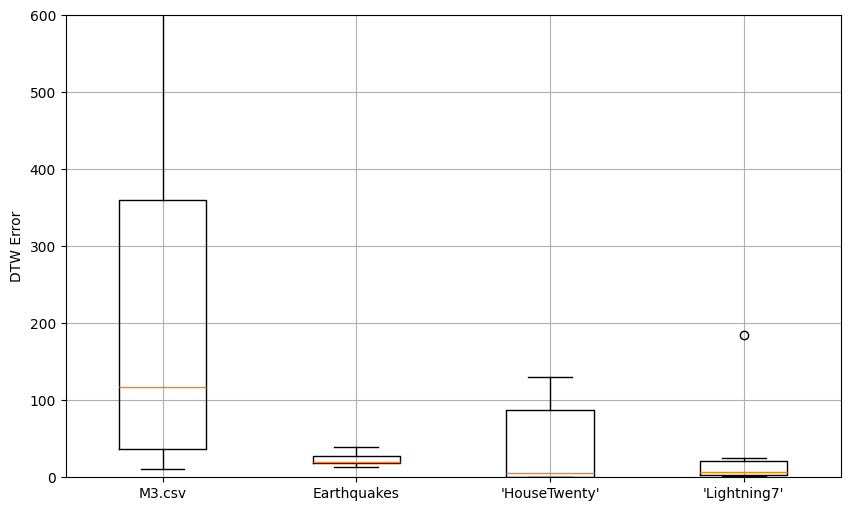

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

def load_and_process_csv(file_path):
    """
    Load and process a CSV file with space-separated values.
    """
    with open(file_path, 'r') as f:
        raw_data = f.read()
    
    # Split the raw data into lines and extract header and rows
    lines = raw_data.split('\n')
    header = lines[0].split()  # Extract column names from the first line

    data = [list(map(float, line.split())) for line in lines[1:] if line.strip()]  # Process rows into numeric values
    
    # Create and return DataFrame
    return pd.DataFrame(data, columns=header)

# File paths to reconstructed results
files_paths_reconstructed = [
    './sensitivity/ABBA_LSTM_results_M3.csv',
   './sensitivity/ABBA_LSTM_results_Earthquakes.csv',
    './sensitivity/ABBA_LSTM_results_HouseTwenty.csv',
    './sensitivity/ABBA_LSTM_results_Lightning7.csv'
]

# Load DTW errors for each dataset
dtw_errors = []
for file_path in files_paths_reconstructed:
    reconstructed_data = load_and_process_csv(file_path)
    dtw_error = reconstructed_data['DTW'].values  # Replace 'DTW_error' if needed
    dtw_errors.append(dtw_error)

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(dtw_errors, labels=["M3.csv", "Earthquakes", "'HouseTwenty'", "'Lightning7'"])

# Customize the plot
plt.ylabel('DTW Error')
plt.ylim(0, 600)
plt.grid(True)

# Show the plot
plt.show()


### Test of accuracy again prediction erros

In [5]:
from accuracy import test_accuracy

In [ ]:
test_accuracy()

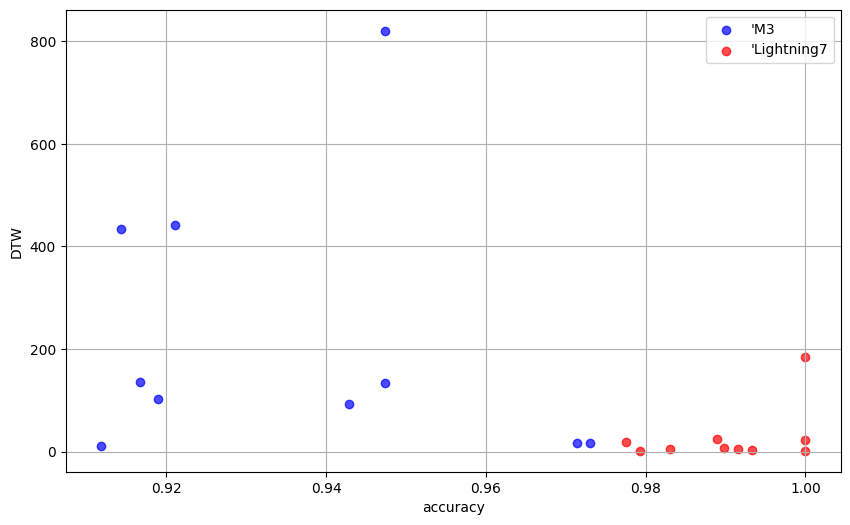

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_process_csv(file_path):

    with open(file_path, 'r') as f:
        raw_data = f.read()
    
    # Split the raw data into lines and extract header and rows
    lines = raw_data.split('\n')
    header = lines[0].split()  # Extract column names from the first line

    data = [list(map(float, line.split())) for line in lines[1:] if line.strip()]  # Process rows into numeric values
    
    # Create and return DataFrame
    return pd.DataFrame(data, columns=header)

def plot_comparison(df, x_metric, y_metric, label, color):
    plt.scatter(df[x_metric], df[y_metric], label=label, color=color, alpha=0.7)

# File paths for datasets
file_paths = [
    ("./test_accuracy/ABBA_LSTM_results_M3.csv", "'M3", 'blue'),
    ("./test_accuracy/ABBA_LSTM_results_Lightning7.csv", "'Lightning7", 'red')
]

x_metric = 'accuracy'
y_metric = 'DTW'

plt.figure(figsize=(10, 6))

# Process each file and plot
for file_path, label, color in file_paths:
    df = load_and_process_csv(file_path)
    plot_comparison(df, x_metric, y_metric, label, color)

# Finalize the plot
plt.xlabel(x_metric)
plt.ylabel(y_metric)
plt.legend()
plt.grid()
plt.show()


### Test equal running time

In [8]:
from test_against_nb_parameters import test_against_nb_parameters

In [ ]:
test_against_nb_parameters()

See qualitative results in /time/plot/

### test adding stochastisty

In [10]:
from add_randomness import test_adding_randomness

In [ ]:
test_adding_randomness()

See qualitative results in /stochasticity/plot/